## Stroke Risk Analysis

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

**Data Overview**

In [209]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [210]:
df.shape

(5110, 12)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [212]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Data Cleaning**

In [213]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [214]:
q99 = df['bmi'].quantile(0.99)
df['bmi'] = df['bmi'].clip(upper=q99)

In [215]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [216]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.834264,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.443796,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,53.400000,1.000000


**Overview of Stroke Incidence**

Stroke Incidence:

stroke
No Stroke    4861
Stroke        249
Name: count, dtype: int64


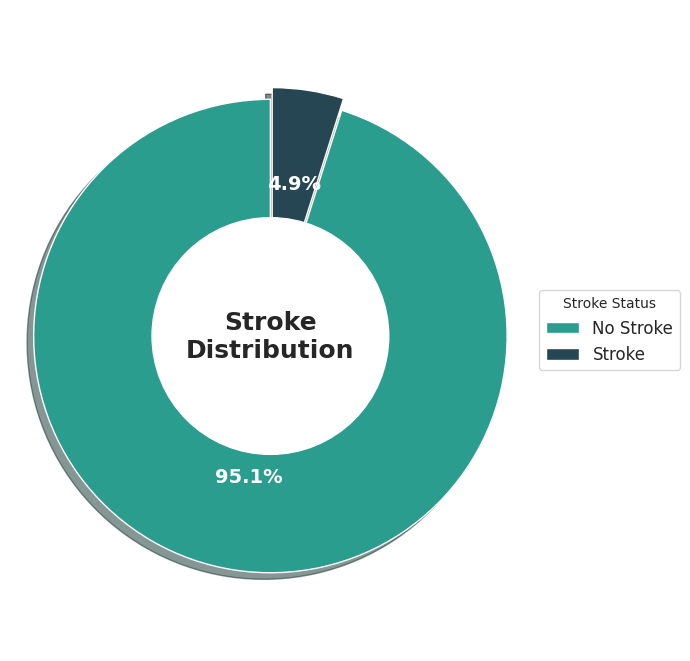

In [217]:
stroke_labeled = df['stroke'].replace({0: 'No Stroke', 1: 'Stroke'})
stroke_counts = stroke_labeled.value_counts()
print("Stroke Incidence:\n")
print(stroke_counts)

plt.figure(figsize=(7,7))
explode = (0, 0.05)
wedges, texts, autotexts = plt.pie(
    stroke_counts,
    labels=stroke_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#2a9d8f', '#264653'],
    explode=explode,
    shadow=True,
    textprops={'fontsize': 14, 'weight': 'bold', 'color': 'white'}
)

centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(wedges, stroke_counts.index,
           title="Stroke Status",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=12)

plt.text(0, 0, 'Stroke\nDistribution', horizontalalignment='center',
         verticalalignment='center', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

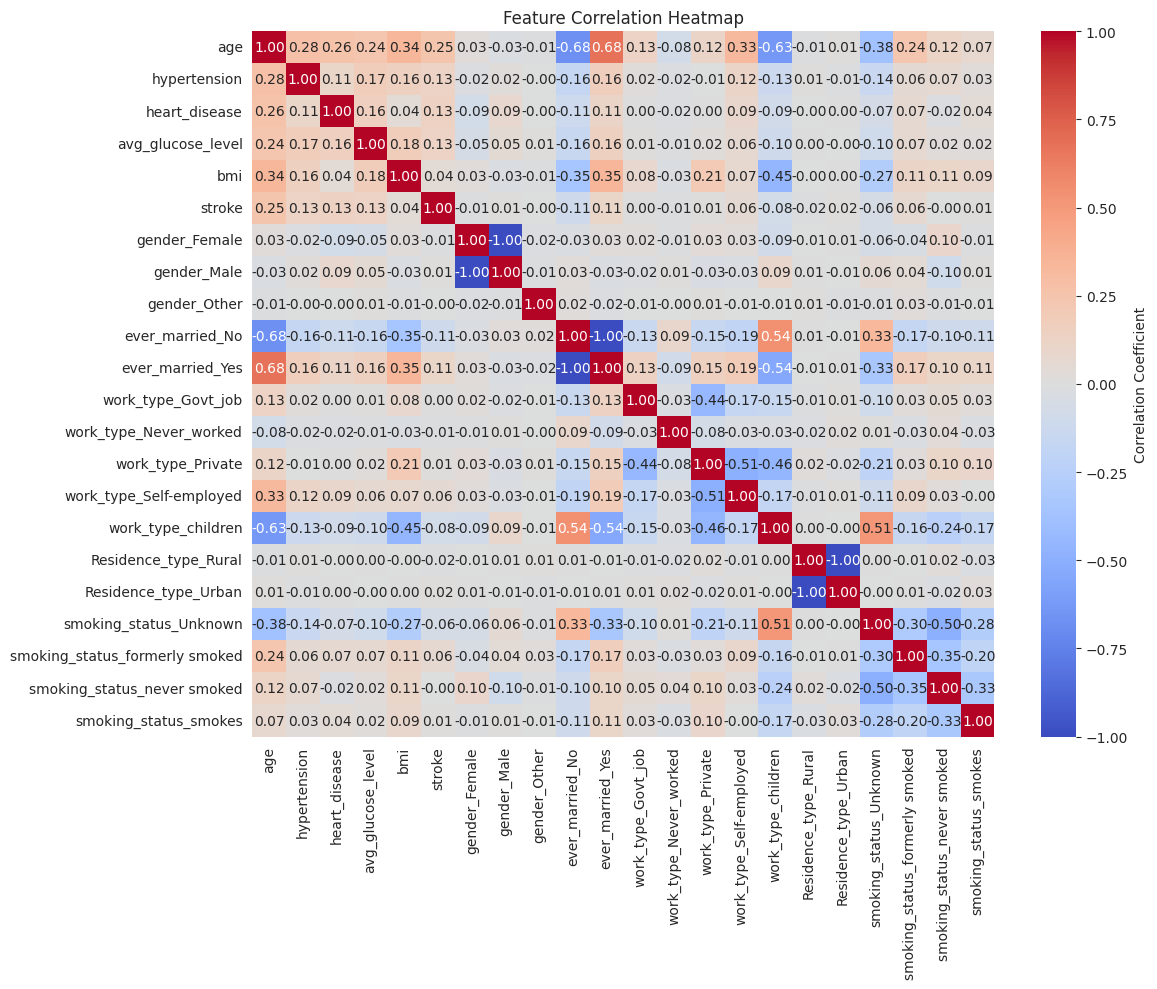

In [218]:
if 'id' in df.columns:
    df = df.drop(columns=['id'])
df_encoded = pd.get_dummies(df, drop_first=False)

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

Stroke Distribution by Age Group & Gender

In [219]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 75, 100],
                         labels=['<30', '30-45', '45-60', '60-75', '75+'])

pd.crosstab([df['age_group'], df['gender']], df['stroke'], normalize='index') * 100

stroke                     0          1
age_group gender                       
<30       Female   99.775028   0.224972
          Male    100.000000   0.000000
          Other   100.000000   0.000000
30-45     Female   98.809524   1.190476
          Male     99.202128   0.797872
45-60     Female   95.238095   4.761905
          Male     94.767442   5.232558
60-75     Female   91.139241   8.860759
          Male     89.315068  10.684932
75+       Female   80.139373  19.860627
          Male     78.089888  21.910112

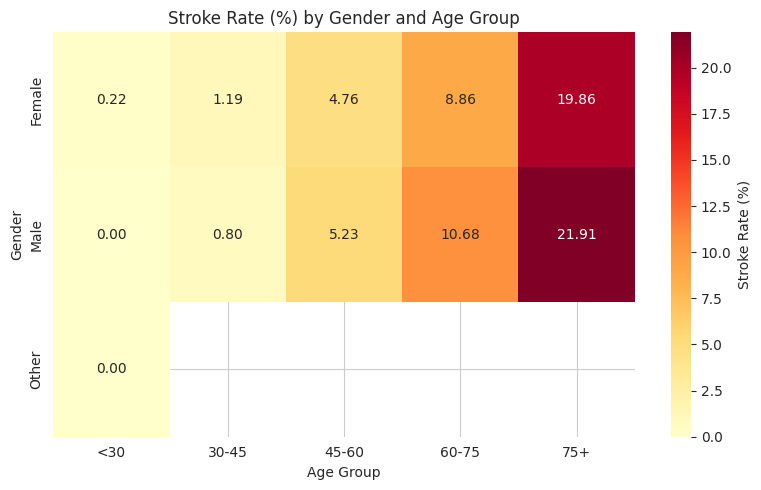

In [220]:
summary = df.groupby(['gender', 'age_group'], observed=True)['stroke'].mean().reset_index()
summary['stroke_rate_percent'] = summary['stroke'] * 100

heatmap_data = summary.pivot(index='gender', columns='age_group', values='stroke_rate_percent')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Stroke Rate (%)'})
plt.title('Stroke Rate (%) by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

**Stroke Rate by Health and Lifestyle Factors**

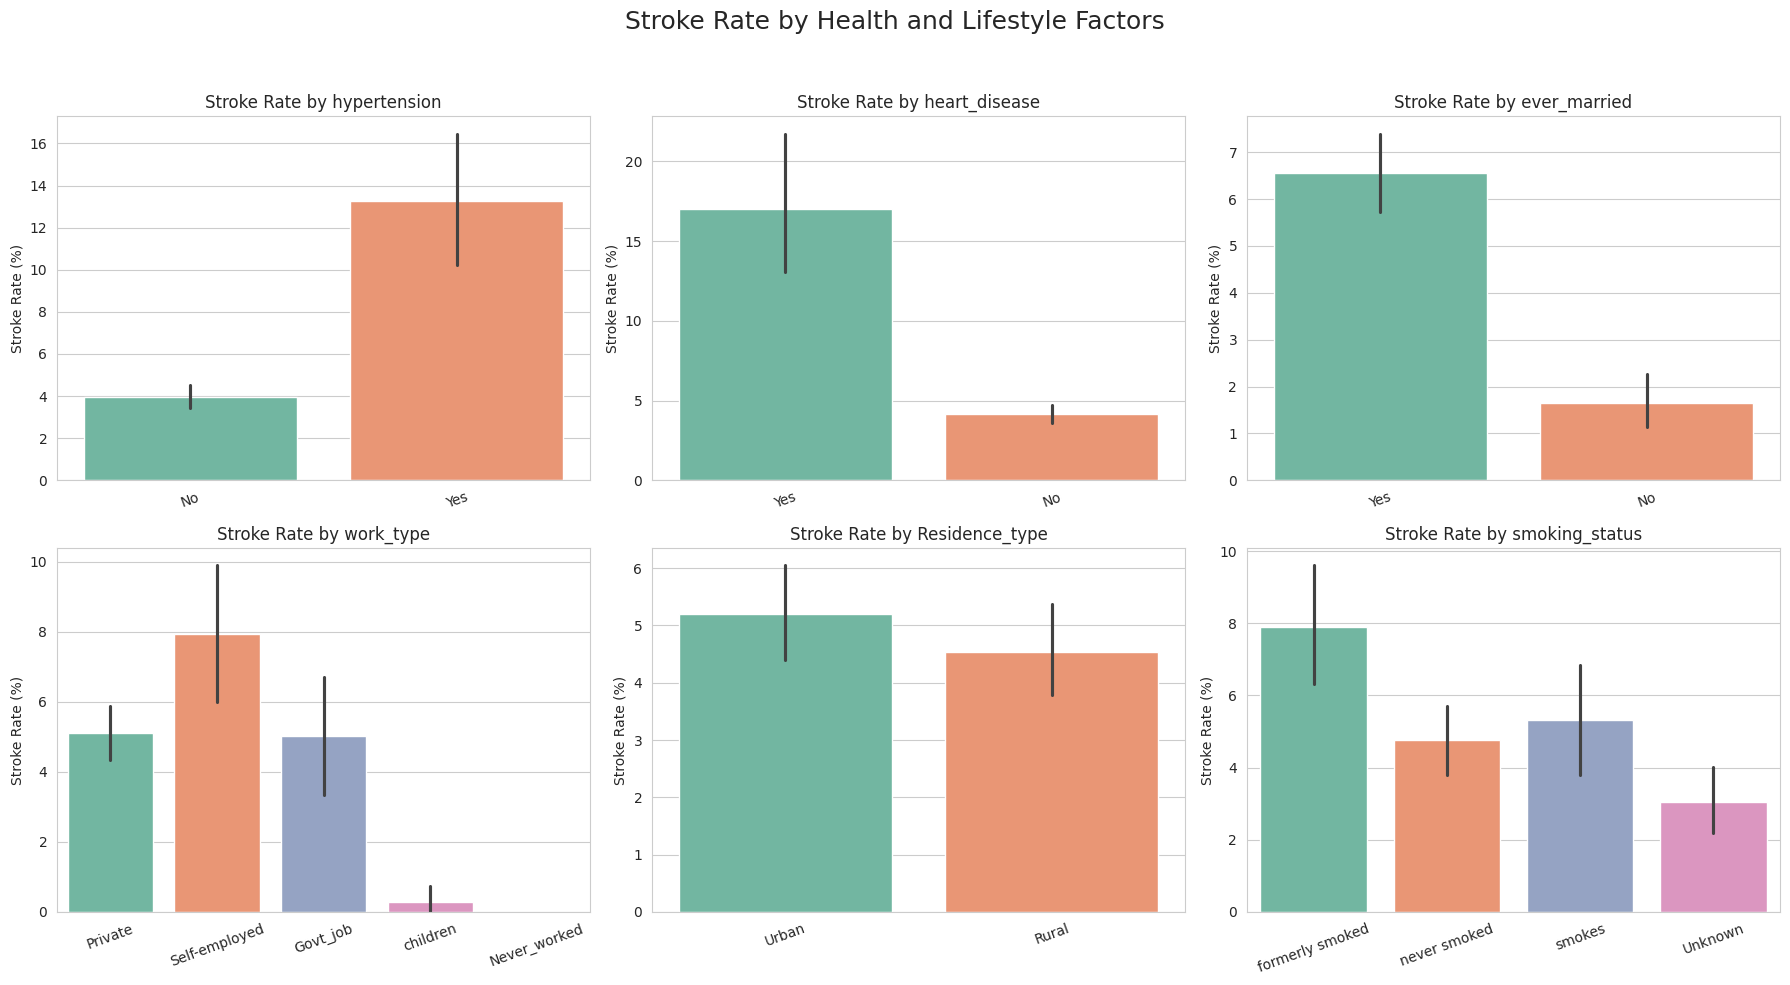

In [221]:
df_plot = df.copy()
df_plot['hypertension'] = df_plot['hypertension'].map({0: 'No', 1: 'Yes'})
df_plot['heart_disease'] = df_plot['heart_disease'].map({0: 'No', 1: 'Yes'})

categorical_features = ['hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.barplot(
        data=df_plot,
        x=col,
        y='stroke',
        estimator=lambda x: sum(x)/len(x)*100,
        ax=axes[i],
        hue=col,
        palette='Set2',
        legend=False
    )
    axes[i].set_title(f'Stroke Rate by {col}')
    axes[i].set_ylabel('Stroke Rate (%)')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=20)

plt.suptitle('Stroke Rate by Health and Lifestyle Factors', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

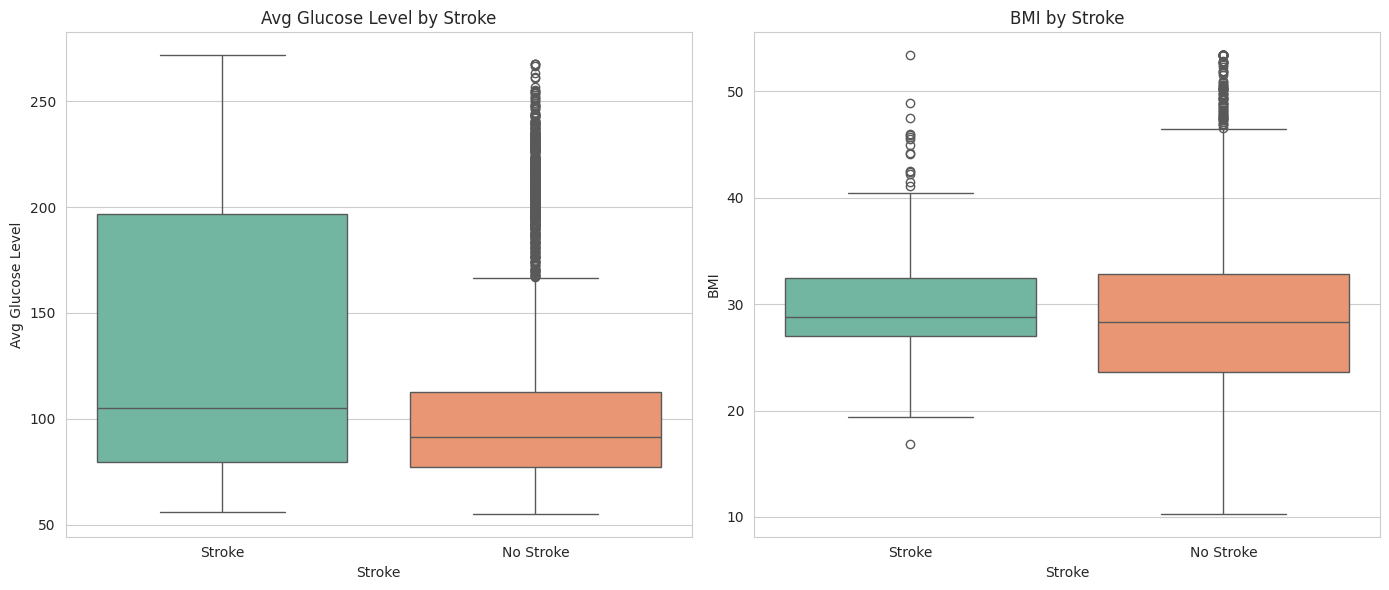

In [222]:
df['stroke_label'] = df['stroke'].replace({0: 'No Stroke', 1: 'Stroke'})

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, x='stroke_label', y='avg_glucose_level', hue='stroke_label',
            ax=axs[0], palette='Set2', legend=False)
axs[0].set_title('Avg Glucose Level by Stroke')
axs[0].set_xlabel('Stroke')
axs[0].set_ylabel('Avg Glucose Level')

sns.boxplot(data=df, x='stroke_label', y='bmi', hue='stroke_label',
            ax=axs[1], palette='Set2', legend=False)
axs[1].set_title('BMI by Stroke')
axs[1].set_xlabel('Stroke')
axs[1].set_ylabel('BMI')

plt.tight_layout()
plt.show()

# Do people with hypertension and heart disease have significantly higher stroke risk?

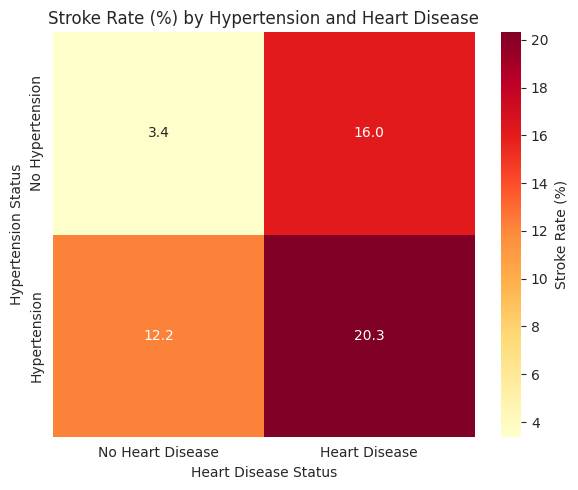

In [223]:
summary_hd = df.groupby(['hypertension', 'heart_disease'], observed=False)['stroke'].mean().unstack() * 100
summary_hd.index = summary_hd.index.map({0: 'No Hypertension', 1: 'Hypertension'})
summary_hd.columns = summary_hd.columns.map({0: 'No Heart Disease', 1: 'Heart Disease'})

#heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(summary_hd, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Stroke Rate (%)'})
plt.title('Stroke Rate (%) by Hypertension and Heart Disease')
plt.ylabel('Hypertension Status')
plt.xlabel('Heart Disease Status')
plt.tight_layout()
plt.show()

# Is stroke risk higher for those with both hypertension and high glucose levels?

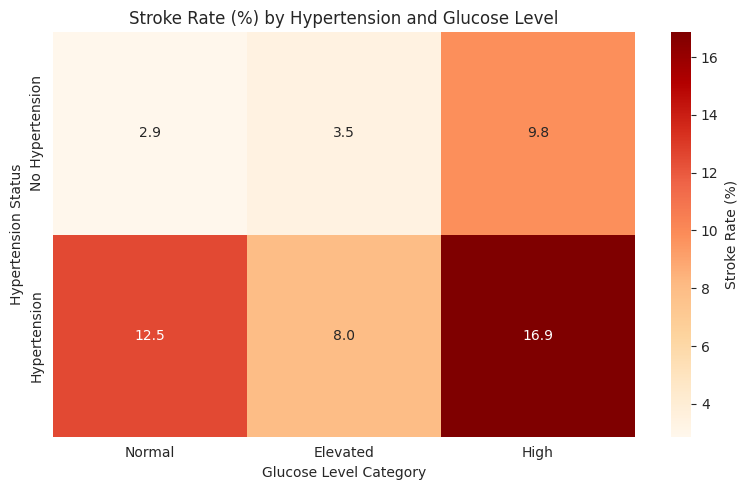

In [225]:
df['glucose_cat'] = pd.cut(df['avg_glucose_level'],
                           bins=[0, 100, 140, df['avg_glucose_level'].max()],
                           labels=['Normal', 'Elevated', 'High'])

summary = df.groupby(['hypertension', 'glucose_cat'], observed=False)['stroke'].mean().unstack()* 100
summary.index = summary.index.map({0: 'No Hypertension', 1: 'Hypertension'})

plt.figure(figsize=(8, 5))
sns.heatmap(summary, annot=True, fmt=".1f", cmap="OrRd", cbar_kws={'label': 'Stroke Rate (%)'})
plt.title('Stroke Rate (%) by Hypertension and Glucose Level')
plt.ylabel('Hypertension Status')
plt.xlabel('Glucose Level Category')
plt.tight_layout()
plt.show()